# BUILDING A LINEAR REGRESSION MODEL ON GARMENT WORKER'S PRODUCTIVITY

#### DATA DESCRIPTION 
The Garment Industry is one of the key examples of the industrial globalization of this modern era. It is a highly labour-intensive industry with lots of manual processes. Satisfying the huge global demand for garment products is mostly dependent on the production and delivery performance of the employees in the garment manufacturing companies. So, it is highly desirable among the decision makers in the garments industry to track, analyse and predict the productivity performance of the working teams in their factories. This dataset can be used for regression purpose by predicting the productivity range (0-1) or for classification purpose by transforming the productivity range (0-1) into different classes.

#### Attribute Information:

01 date : Date in MM-DD-YYYY

02 day : Day of the Week

03 quarter : A portion of the month. A month was divided into four quarters

04 department : Associated department with the instance

05 team_no : Associated team number with the instance

06 no_of_workers : Number of workers in each team

07 no_of_style_change : Number of changes in the style of a particular product

08 targeted_productivity : Targeted productivity set by the Authority for each team for each day.

09 smv : Standard Minute Value, it is the allocated time for a task

10 wip : Work in progress. Includes the number of unfinished items for products

11 over_time : Represents the amount of overtime by each team in minutes

12 incentive : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.

13 idle_time : The amount of time when the production was interrupted due to several reasons

14 idle_men : The number of workers who were idle due to production interruption

15 actual_productivity : The actual % of productivity that was delivered by the workers. It ranges from 0-1.



In [2]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro
from numpy.random import randn
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [4]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00597/garments_worker_productivity.csv")

In [5]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [7]:
new_df = df.drop('wip',axis=1)

In [9]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   over_time              1197 non-null   int64  
 8   incentive              1197 non-null   int64  
 9   idle_time              1197 non-null   float64
 10  idle_men               1197 non-null   int64  
 11  no_of_style_change     1197 non-null   int64  
 12  no_of_workers          1197 non-null   float64
 13  actual_productivity    1197 non-null   float64
dtypes: float64(5), int64(5), object(4)
memory usage: 131.0+ 

In [10]:
new_df.describe()

,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


#### Checking the assumptions of linear regression

In [30]:
#H0 : DATA FOLLOWS A NORMAL DISTRIBUTION
#H1 : DATA DOES NOT FOLLOW A NORMAL DISTRIBUTION

shapiro(new_df['actual_productivity'])

ShapiroResult(statistic=0.9439454078674316, pvalue=6.873566352140921e-21)

The p value < 0.05 and hence we reject H0 that data is not following a normal distribution.

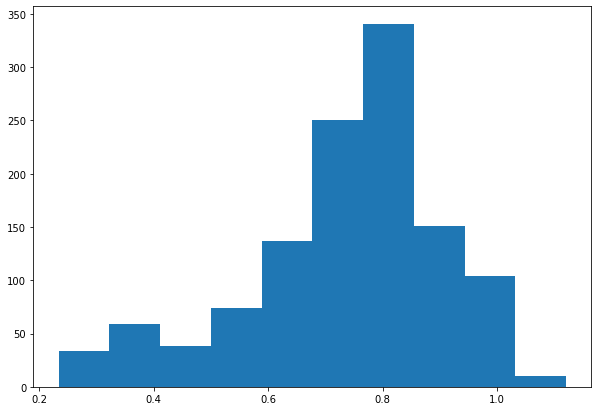

In [13]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(new_df['actual_productivity'])
 
# Show plot
plt.show()

Histogram also shows that that data is not normally distributed

In [14]:
new_df = new_df.drop(['date','quarter','department','day','team'],axis=1)

In [15]:
new_df.head() #data frame with regressors and response variable alone


,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725
1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500
2,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
3,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
4,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382


In [16]:
new_df.isnull() #checking for null value in the data

,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1192,False,False,False,False,False,False,False,False,False
1193,False,False,False,False,False,False,False,False,False
1194,False,False,False,False,False,False,False,False,False
1195,False,False,False,False,False,False,False,False,False


In [17]:
new_df.dropna() #dropping the null values


,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725
1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500
2,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
3,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
4,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...
1192,0.75,2.90,960,0,0.0,0,0,8.0,0.628333
1193,0.70,3.90,960,0,0.0,0,0,8.0,0.625625
1194,0.65,3.90,960,0,0.0,0,0,8.0,0.625625
1195,0.75,2.90,1800,0,0.0,0,0,15.0,0.505889


### SCATTER PLOT 

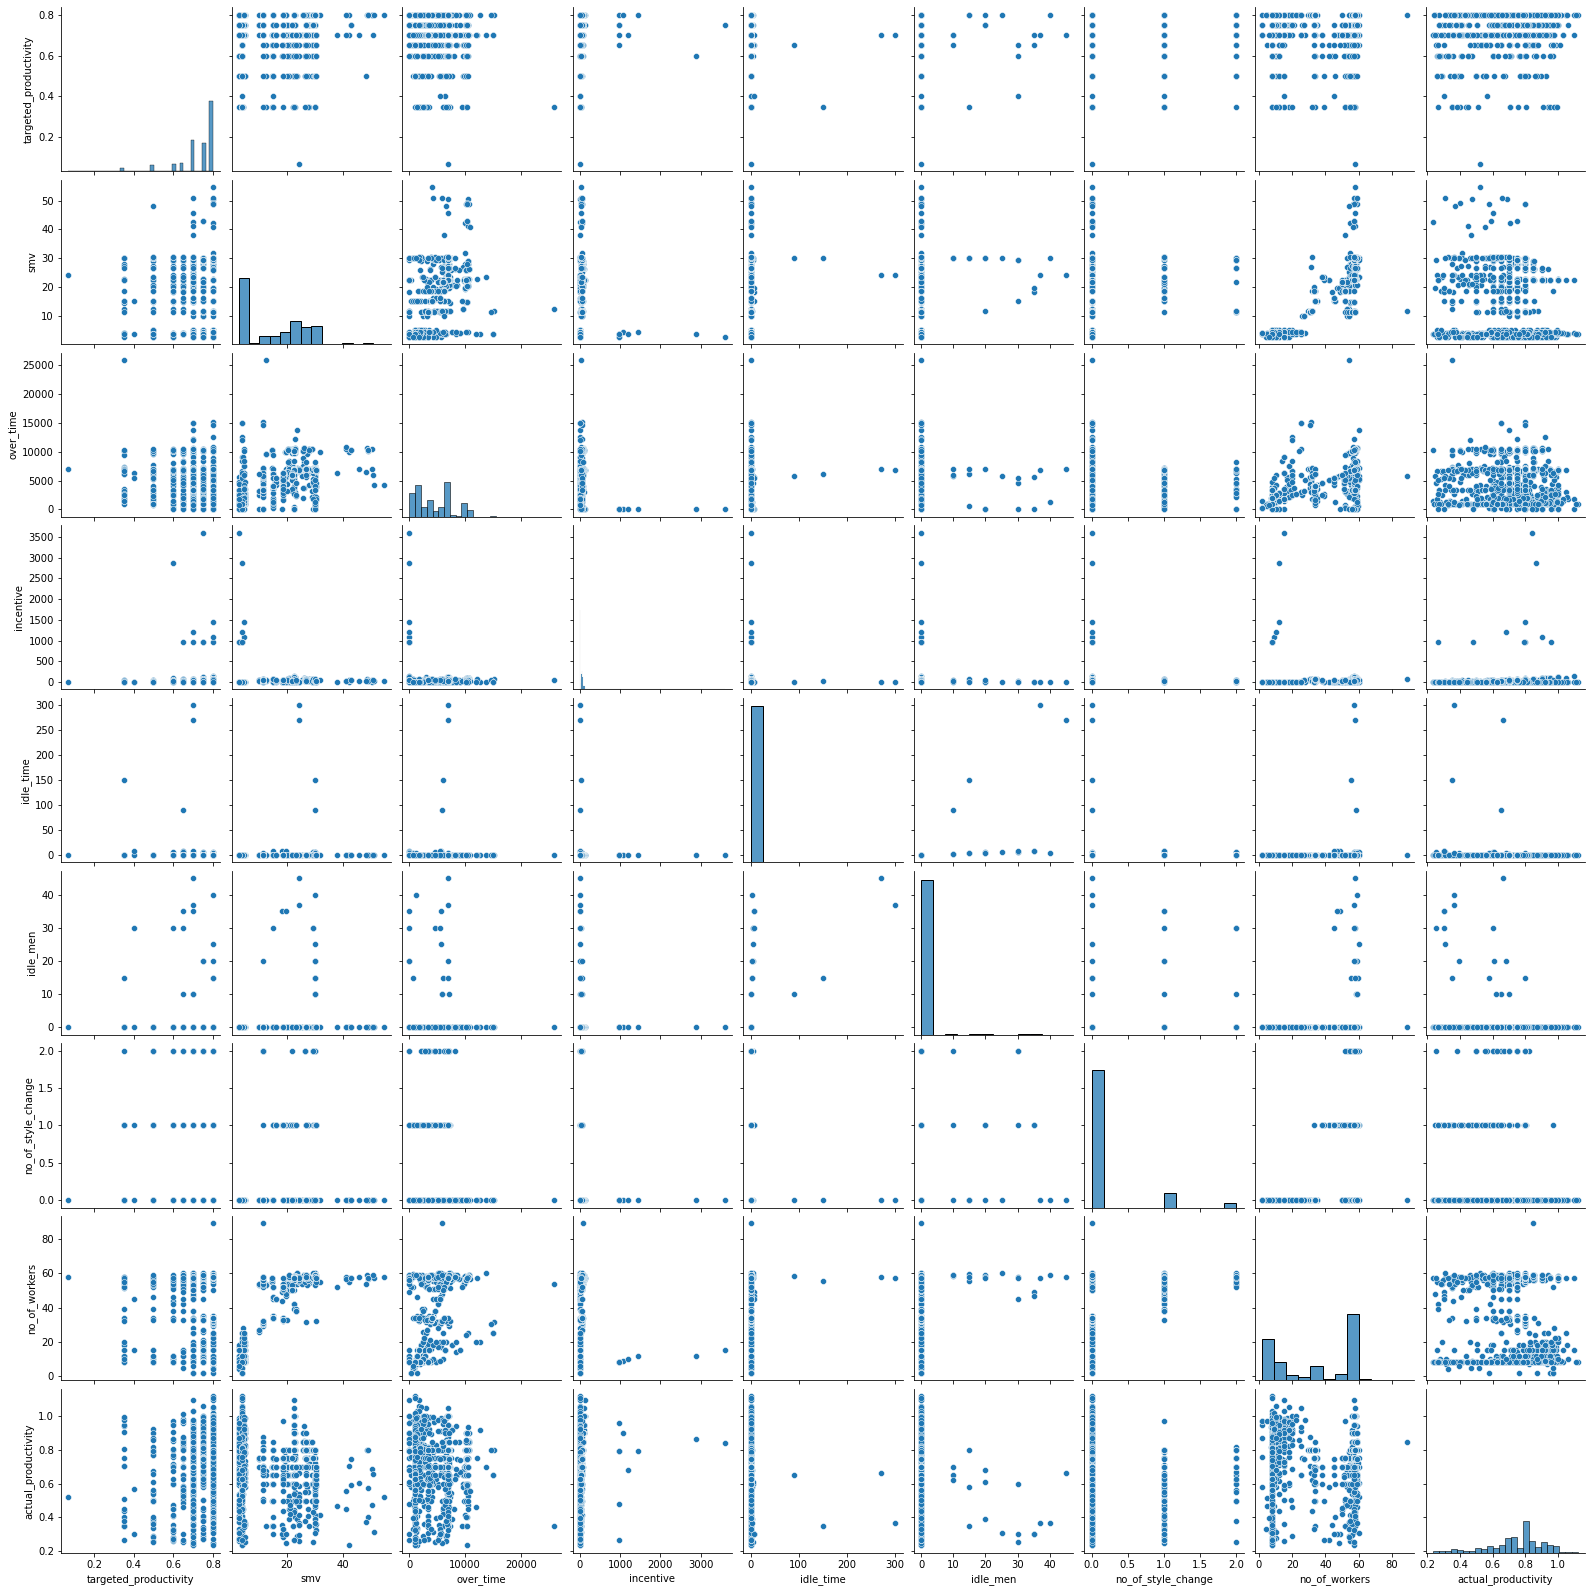

In [18]:
sns.pairplot(new_df)
plt.show()

### Defining x and y variables

In [19]:
y = new_df['actual_productivity']
x = new_df.drop('actual_productivity',axis=1)

### Splitting into training and testing sets

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0) 

In [22]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 957 entries, 361 to 684
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   targeted_productivity  957 non-null    float64
 1   smv                    957 non-null    float64
 2   over_time              957 non-null    int64  
 3   incentive              957 non-null    int64  
 4   idle_time              957 non-null    float64
 5   idle_men               957 non-null    int64  
 6   no_of_style_change     957 non-null    int64  
 7   no_of_workers          957 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 67.3 KB


In [23]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 700 to 953
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   targeted_productivity  240 non-null    float64
 1   smv                    240 non-null    float64
 2   over_time              240 non-null    int64  
 3   incentive              240 non-null    int64  
 4   idle_time              240 non-null    float64
 5   idle_men               240 non-null    int64  
 6   no_of_style_change     240 non-null    int64  
 7   no_of_workers          240 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 16.9 KB


### LINEAR REGRESSION

In [24]:
clf = LinearRegression() #object for the class linear regression
clf.fit(x_train,y_train) #fitting the train set
y_pred = clf.predict(x_test) #predicting the model. 
#fit and predict are common for alll ML techniques
print(r2_score(y_test,y_pred))

0.26924212279005744


Since the R squared value is 0.26, only 26% of the variaboility in the variable 'actual productivity' is explained by the regressors.

In [25]:
from sklearn.metrics import mean_squared_error 
print(mean_squared_error(y_test,y_pred)) #mse can be checked when more than one regression model is used. 
#to compare the better regression model

0.021605478799002986


Mean square value is very small.

In [26]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,y_pred))

0.10513686120131413


In [27]:
res = y_test - y_pred
res

700     0.008585
621     0.170163
319     0.176676
837    -0.142521
761    -0.086725
          ...   
686     0.003352
906     0.026536
866     0.023701
1128    0.121118
953    -0.005110
Name: actual_productivity, Length: 240, dtype: float64

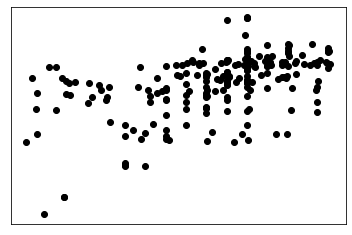

In [28]:
plt.scatter(y_test,y_pred,color = "black")
plt.xticks(())
plt.yticks(())

plt.show()

### Residuals vs fitted plot

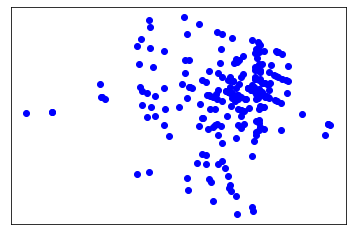

In [29]:
plt.scatter(y_pred,res,color = "blue")
plt.xticks(())
plt.yticks(())

plt.show()


Since the graph is randomly scattered,the assumptions of Linearity and constant variance is violated.
Therefore model is not a good one for the prediction of response variable.

The data under consideration delt with garment worker's productivity. After checking the assumptions of Linear Regression it was found that it doesnt follow Normal distribution and from the Residual vs fitted plot ,it is clear that the data is not linear as well has non-constant variance because the graph is randomly scattered. From the scatter plot not much of linearity was observed between regressors and response variable. The R square vale was found out to be 0.26 which implies that only 26% variability in response variable is explained by the regressors and also MSE value is low.So we can conclude that the model is not a good fit to predict the actual productivity of the workers..